<a href="https://colab.research.google.com/github/gptwang/finance_learning/blob/master/%E8%82%A1%E7%A5%A8%E3%80%81%E5%80%BA%E5%88%B8%E3%80%81%E6%88%BF%E5%9C%B0%E4%BA%A7%E5%92%8C%E9%BB%84%E9%87%91%E7%9A%84%E5%8E%86%E5%8F%B2%E5%9B%9E%E6%8A%A5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 数据
 数据说明请看：https://pages.stern.nyu.edu/~adamodar/New_Home_Page/home.htm

In [1]:
import pandas as pd
import requests
import warnings
warnings.filterwarnings('ignore')

url = 'https://pages.stern.nyu.edu/~adamodar/pc/datasets/histretSP.xls'

# Disable SSL verification
response = requests.get(url, verify=False)

# Write the content to a local file
with open('histretSP.xls', 'wb') as file:
    file.write(response.content)


# Read the Excel file
df_return = pd.read_excel('histretSP.xls',sheet_name=1,usecols=[0,1,3,5,6,7,9,11,12,17],skiprows=17, nrows=95)

In [2]:
df_dividend = pd.read_excel('histretSP.xls',sheet_name=3,usecols=[3],skiprows=3, nrows=95,header=None)

In [3]:
df = df_return
df['dividend'] = df_dividend

## 每列数据说明
- 年份
- 标普500年华收益率
- 10年国债年收益率
- 房地产年华收益率
- 黄金年华收益率
- 标普500收益
- 10年国债收益
- 房地产收益
- 黄金收益
- 通货膨胀
- 分红

In [4]:
df

,Year,S&P 500 (includes dividends),US T. Bond,Real Estate,Gold*,S&P 500 (includes dividends)3,US T. Bond5,Real Estate2,Gold2,Inflation Rate,dividend
0,1928,0.438112,0.008355,0.014911,0.000969,143.811155,100.835471,101.491054,100.096899,-0.011561,0.043000
1,1929,-0.082979,0.042038,-0.020568,-0.001452,131.877782,105.074397,99.403579,99.951550,0.005848,0.041000
2,1930,-0.251236,0.045409,-0.043000,0.000969,98.745288,109.845753,95.129225,100.048450,-0.063953,0.047000
3,1931,-0.438375,-0.025589,-0.081505,-0.173850,55.457774,107.034958,87.375746,82.655039,-0.093168,0.061000
4,1932,-0.086424,0.087903,-0.104664,0.212778,50.664911,116.443660,78.230616,100.242248,-0.102740,0.072000
...,...,...,...,...,...,...,...,...,...,...,...
90,2018,-0.042269,-0.000167,0.045327,-0.009295,382870.937409,7308.653674,3507.932122,6196.705426,0.019102,0.021441
91,2019,0.312117,0.096356,0.036916,0.190774,502371.389193,8012.888554,3637.430471,7378.875969,0.022851,0.018107
92,2020,0.180232,0.113319,0.103461,0.241694,592914.798591,8920.900883,4013.763635,9162.306202,0.013620,0.015175
93,2021,0.284689,-0.044160,0.189143,-0.037544,761710.833617,8526.950827,4772.939140,8818.313953,0.071000,0.012421


In [5]:

# 计算每一年的资产价值
# 初始资产价值
inflation_value = 1
inflation_values =[]


# 遍历 DataFrame 中的回报率，计算资产价值
for i in range(0, len(df)):

    # 资产价值等于前一年的资产价值乘以 (1 + 今年的回报率)
    inflation_value *= (1 + df.iloc[i, 9])
    inflation_values.append(inflation_value)

df['Inflation_Value'] = inflation_values
df['S&P 500 (includes dividends)3'] = df['S&P 500 (includes dividends)3'] / 100.0
df['US T. Bond5'] = df['US T. Bond5'] / 100.0
df['Real Estate2'] = df['Real Estate2'] / 100.0
df['Gold2'] = df['Gold2'] / 100.0


In [6]:
df

,Year,S&P 500 (includes dividends),US T. Bond,Real Estate,Gold*,S&P 500 (includes dividends)3,US T. Bond5,Real Estate2,Gold2,Inflation Rate,dividend,Inflation_Value
0,1928,0.438112,0.008355,0.014911,0.000969,1.438112,1.008355,1.014911,1.000969,-0.011561,0.043000,0.988439
1,1929,-0.082979,0.042038,-0.020568,-0.001452,1.318778,1.050744,0.994036,0.999516,0.005848,0.041000,0.994220
2,1930,-0.251236,0.045409,-0.043000,0.000969,0.987453,1.098458,0.951292,1.000484,-0.063953,0.047000,0.930636
3,1931,-0.438375,-0.025589,-0.081505,-0.173850,0.554578,1.070350,0.873757,0.826550,-0.093168,0.061000,0.843931
4,1932,-0.086424,0.087903,-0.104664,0.212778,0.506649,1.164437,0.782306,1.002422,-0.102740,0.072000,0.757225
...,...,...,...,...,...,...,...,...,...,...,...,...
90,2018,-0.042269,-0.000167,0.045327,-0.009295,3828.709374,73.086537,35.079321,61.967054,0.019102,0.021441,14.522131
91,2019,0.312117,0.096356,0.036916,0.190774,5023.713892,80.128886,36.374305,73.788760,0.022851,0.018107,14.853981
92,2020,0.180232,0.113319,0.103461,0.241694,5929.147986,89.209009,40.137636,91.623062,0.013620,0.015175,15.056293
93,2021,0.284689,-0.044160,0.189143,-0.037544,7617.108336,85.269508,47.729391,88.183140,0.071000,0.012421,16.125290


In [7]:
df.to_csv('new_data.csv')

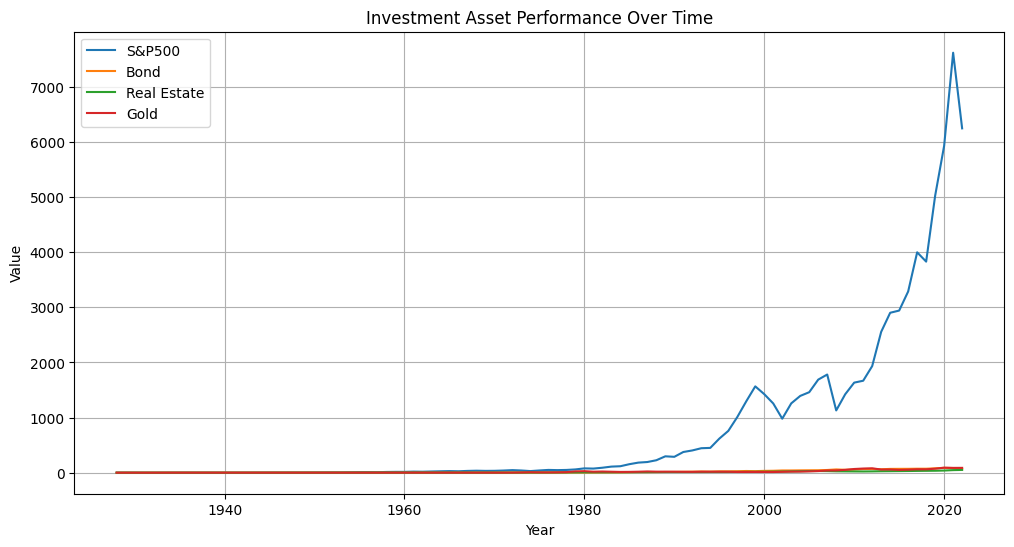

In [8]:
import matplotlib.pyplot as plt
# Plotting all the columns except 'year'

plt.figure(figsize=(12,6))


plt.plot(df['Year'], df['S&P 500 (includes dividends)3'], label='S&P500')
plt.plot(df['Year'], df['US T. Bond5'], label='Bond')
plt.plot(df['Year'], df['Real Estate2'], label='Real Estate')
plt.plot(df['Year'], df['Gold2'], label='Gold')

plt.xlabel('Year')
plt.ylabel('Value')
plt.title('Investment Asset Performance Over Time')
plt.legend()
plt.grid(True)
plt.show()

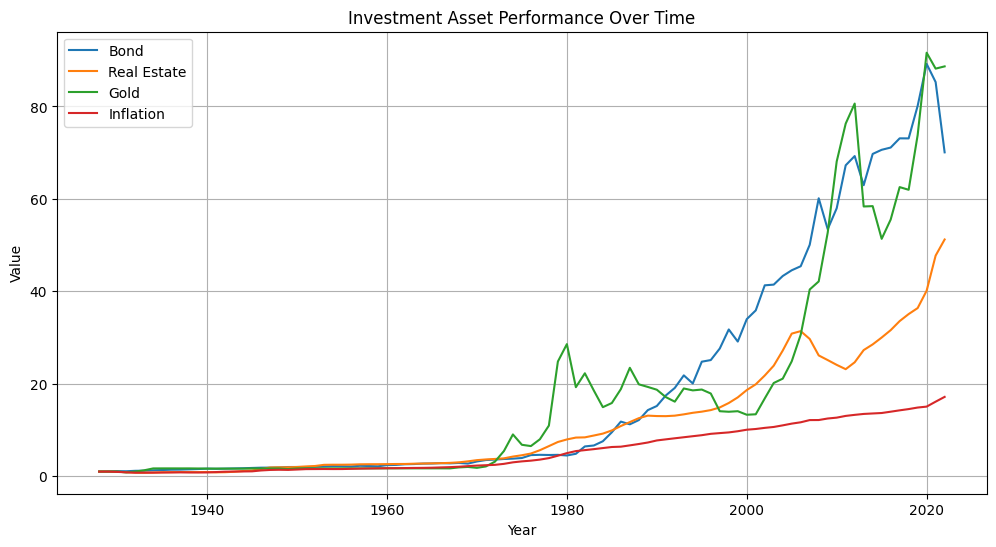

In [9]:
plt.figure(figsize=(12,6))


plt.plot(df['Year'], df['US T. Bond5'], label='Bond')
plt.plot(df['Year'], df['Real Estate2'], label='Real Estate')
plt.plot(df['Year'], df['Gold2'], label='Gold')
plt.plot(df['Year'], df['Inflation_Value'], label='Inflation')

plt.xlabel('Year')
plt.ylabel('Value')
plt.title('Investment Asset Performance Over Time')
plt.legend()
plt.grid(True)
plt.show()

## 分红和收益率对比

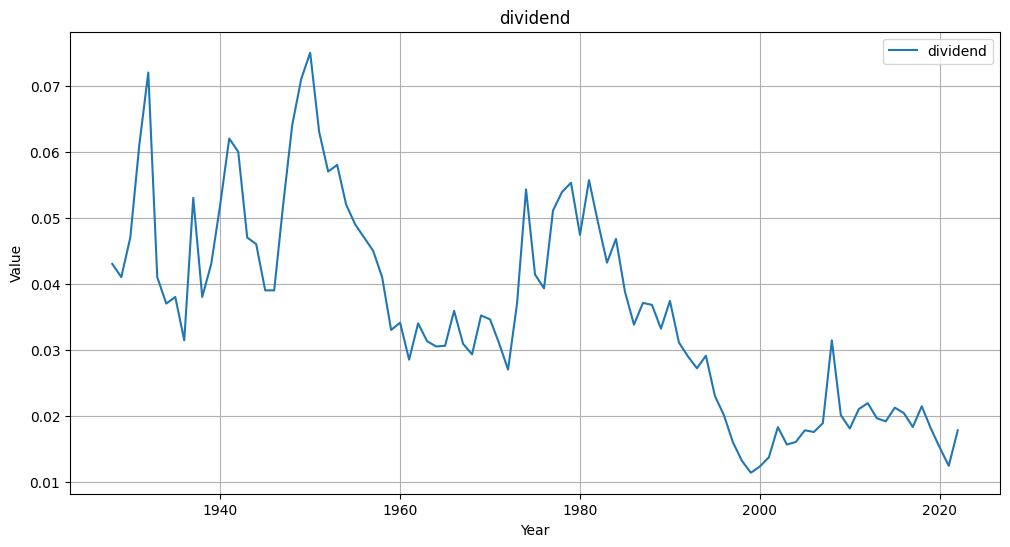

In [12]:
plt.figure(figsize=(12,6))


#plt.plot(df['Year'], df['S&P 500 (includes dividends)'], label='S&P 500')
plt.plot(df['Year'], df['dividend'], label='dividend')


plt.xlabel('Year')
plt.ylabel('Value')
plt.title('dividend')
plt.legend()
plt.grid(True)
plt.show()